In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-07 10:45:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-07 10:45:12 (33.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
!ls


moore.csv  sample_data


In [ ]:
data = pd.read_csv('moore.csv',header=None).values

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
data.shape

(162, 2)

In [ ]:
X = data[:,0].reshape(-1,1)

In [ ]:
y = data[:,1]

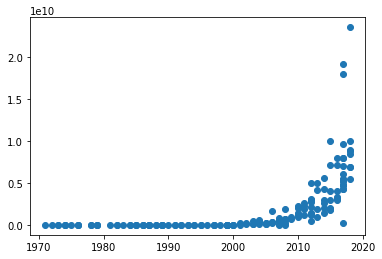

In [ ]:
plt.scatter(X,y)

In [ ]:
y =  np.log(y)

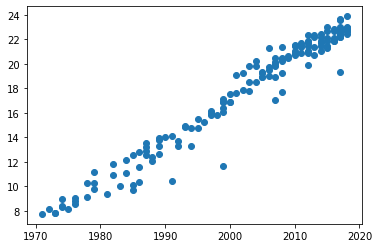

In [ ]:
plt.scatter(X,y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss = 'mse')

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X,y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 505.5770
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 324.6266
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 249.1235
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 204.4561
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 147.0779
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 127.4325
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 82.9294
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 69.9680
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 48.3625
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 35.1110
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 32.1471
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 20.4407
Epoch 13/200
6/6 [=========================

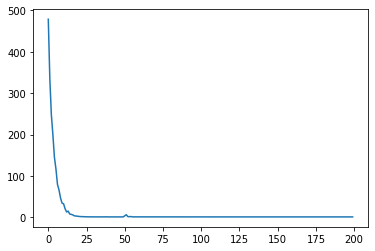

In [ ]:
plt.plot(r.history['loss'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')